# Project Analysis

Original text in black
> Anwsers

<font color=red> NB! Please do not run the notebook as this will cause the codes will run without any data.</font>


#### ALL IMPORTS 

In [1]:
# ALL IMPORTS 

# The superhero network
import networkx as nx
import pandas as pd
import numpy as np
import pickle

# Exercise 1:
import matplotlib.pyplot as plt
import seaborn as sns
from fa2 import ForceAtlas2

# Exercise 2:
import io
import re
import nltk, re, pprint
from nltk import word_tokenize
from collections import Counter
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import copy

# Exercise 3:
from collections import defaultdict
import community

# Exercise 4:



<hr style="border:0.5px solid gray"> </hr>

# The OL Network

> Note: This superhero network and the process of downloading the wikipages is executed in another notebook. These two procedures are presented in the **Appendix** at the end of this notebook. 


### Load the data

> The data is loaded into a panda dataframe. 

In [2]:
# Load the dataframes
df_athletes = pickle.load(open('df_athletes.txt','rb'))
df_countries = pickle.load(open('df_countries.txt','rb'))
df_events = pickle.load(open('df_events.txt','rb'))

# Load the Graph
G = pickle.load(open('G.txt','rb'))
print(G.number_of_nodes())

largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(G.number_of_nodes())



5562
5508


In [19]:
df_countries = pd.read_csv('countries.csv', sep = ';',   encoding = 'latin-1', dtype = object) 

In [22]:
df_countries.shape

(195, 4)

In [20]:
df_athlet = pd.read_csv('athletes.csv', sep = ';',   encoding = 'latin-1', dtype = object) 

In [23]:
df_athlet.shape

(11531, 1)

In [21]:
df_event = pd.read_csv('events.csv', sep = ';',   encoding = 'latin-1', dtype = object) 

In [24]:
df_event.shape

(306, 6)

<hr style="border:0.5px solid gray"> </hr>

#### What is the number of nodes in the network?


In [3]:
print(f"The number of nodes in the network: {G.number_of_nodes()}")

The number of nodes in the network: 5508


#### What is the number of links?

In [4]:
print(f"The number of links in the network: {G.number_of_edges()}")

The number of links in the network: 16180


#### What is the number of links connecting? Explain in your own words what those links mean?

In [5]:
# List the graph data 
G_Nodes = list(G.nodes)
G_edges = list(G.edges)
Attribute_data = list(G.nodes.data())

# Add a counter
UniverseMix = 0

# Go through the universes. If there is en edge from one universe to the other the counter increase +1.
for i in range(len(G_edges)):
    if Attribute_data[G_Nodes.index(G_edges[i][0])][1] != Attribute_data[G_Nodes.index(G_edges[i][1])][1]:
        UniverseMix += 1
        
print(f"The number of links connecting Marvel and DC: {UniverseMix}")

The number of links connecting Marvel and DC: 9069


#### Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.


In [6]:
# Sort the degree to find the most connected characters(in- and out-degrees).
Degree_sort = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("The top 5 most connected characters for both in-degrees and out-degrees:\n",Degree_sort[:5])
print("")
# Sort the in-degree to find the most connected characters.
Degree_sort_in = sorted(G.in_degree, key=lambda x: x[1], reverse = True)
print("The top 5 most connected characters for in-degrees:\n",Degree_sort_in[:5])
print("")
# Sort the out-degree to find the most connected characters.
Degree_sort_out = sorted(G.out_degree, key=lambda x: x[1], reverse = True)
print("The top 5 most connected characters for out-degrees:\n",Degree_sort_out[:5])

The top 5 most connected characters for both in-degrees and out-degrees:
 [('United_States_at_the_2016_Summer_Olympics', 534), ('Germany_at_the_2016_Summer_Olympics', 443), ('Great_Britain_at_the_2016_Summer_Olympics', 345), ('Japan_at_the_2016_Summer_Olympics', 340), ('Italy_at_the_2016_Summer_Olympics', 328)]

The top 5 most connected characters for in-degrees:
 [('Andy_Murray', 59), ('Rafael_Nadal', 53), ('Serena_Williams', 52), ('Fabio_Fognini', 48), ('Jack_Sock', 47)]

The top 5 most connected characters for out-degrees:
 [('United_States_at_the_2016_Summer_Olympics', 516), ('Germany_at_the_2016_Summer_Olympics', 434), ('Japan_at_the_2016_Summer_Olympics', 331), ('Great_Britain_at_the_2016_Summer_Olympics', 328), ('Italy_at_the_2016_Summer_Olympics', 323)]


#### Plot the in and out-degree distributions.

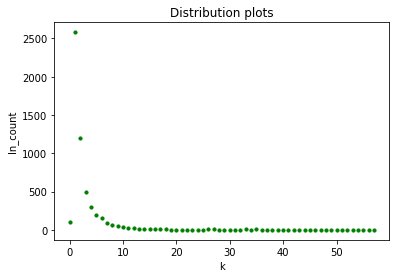

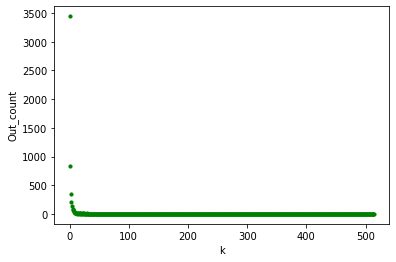

Median for in degree: 2.0
Median for out degree: 0.0


In [25]:
# The In and out-degree datalists
In_Degree = [G.in_degree(i) for i in G.nodes()]
Out_Degree = [G.out_degree(i) for i in G.nodes()]

# The Histograms for the data.
In_hist = np.histogram(In_Degree, bins = range(min(In_Degree), max(In_Degree)))
Out_hist = np.histogram(Out_Degree, bins = range(min(Out_Degree), max(Out_Degree)))

#Plot the in-degree distributions
plt.scatter(np.arange(len(In_hist[0])), In_hist[0], color = "green", s = 10)
plt.ylabel('In_count')
plt.xlabel('k')
plt.title('Distribution plots')
plt.show()

#Plot the out-degree distributions
plt.scatter(np.arange(len(Out_hist[0])), Out_hist[0], color = "green", s = 10)
plt.xlabel('k')
plt.ylabel('Out_count')
plt.show()
print(f"Median for in degree: {np.median(In_Degree)}")
print(f"Median for out degree: {np.median(Out_Degree)}")

> This exercise will show the network of the two universes. To create the visualization the procedure is devided into 4 steps:


> **Step 1:** For the sake of the visualisation, let's convert our network to undirected graph

##  Visualization 

#### Create a nice visualization of the total network.

In [26]:
#Convert to an undirected graph
G_u = G.to_undirected()

> Countries:<font color=red> **Red color** </font>
>
> Events: <font color=blue> **Blue color**</font>
>
> Athletes: <font color=green> **Green color**</font>

In [27]:
# create empty list for node colors
node_color = []

# for each node in the graph
for node in G_u.nodes(data=True):

    # if the node has the attribute contries
    if 'countries' in node[1]['nodetype']:
        node_color.append('red')

    # if the node has the attribute events
    elif 'events' in node[1]['nodetype']:
        node_color.append('blue')
    
    # if the node has the attribute athelets
    else:
        node_color.append('green')
        
G_u_Degree = [G_u.degree(i) for i in G_u.nodes()]


In [28]:
# The force atlas algorithm parameters will obtain the visualization we like
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [29]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution = False, # Dissuade hubs
    edgeWeightInfluence=0.8,
    
    # Performance
    jitterTolerance=0.3, # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=0.5,
    
    # Tuning
    scalingRatio=30.0,
    strongGravityMode=True,
    gravity=10.0,
    
    # Log
    verbose=True
)



100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


BarnesHut Approximation  took  0.72  seconds
Repulsion forces  took  9.24  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


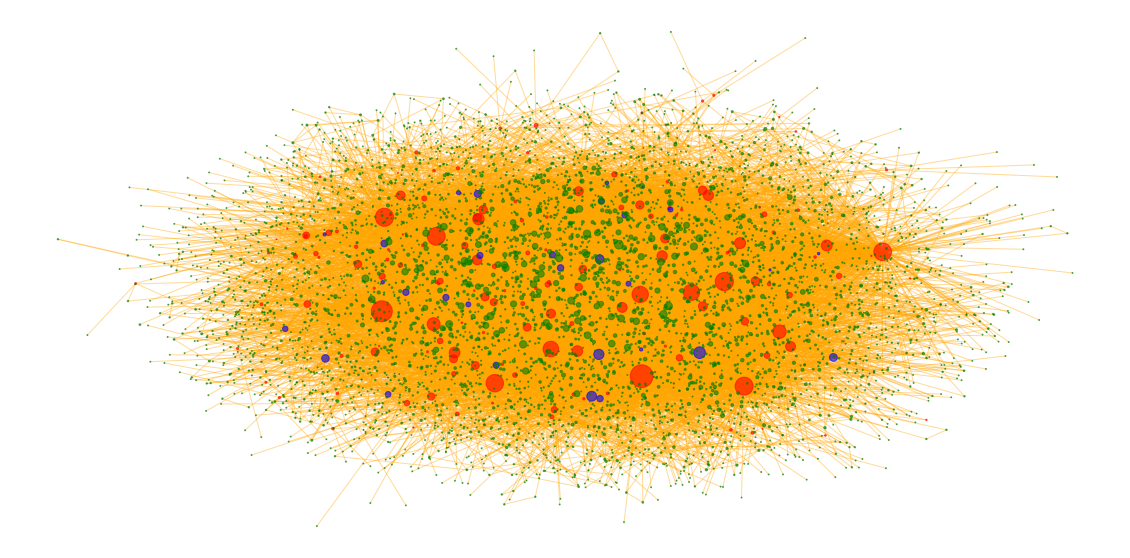

In [31]:
#Show the visualisation
plt.figure(figsize=(20,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_u, pos=None, iterations=10)
nx.draw_networkx_nodes(G_u, positions, node_size =G_u_Degree, node_color = node_color,  alpha=0.6)
nx.draw_networkx_edges(G_u, positions, edge_color="orange",alpha=0.4)
plt.axis('off')
plt.show()

<hr style="border:0.5px solid gray"> </hr>

# Exercise 2: 
Create your own version of the TF-TR word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from the wiki-pages.

Here's what you need to do:

#### Create your own version of the TF-TR word-clouds. Explain your process and comment on your results.

> This exercise will show the words that characterize the two universes by creating a TF-TR word-cloud for each universe. This is done by using word-cloud visualisation techniques. The procedure is divided into 3 steps:


> **Step 1:** We want to aggregate the downloaded wikipages texts into two long lists (one for each universe). Thereafter the frequency of the words is determined. Some data cleaning is performed, so that all non-relevant words such as stopwords are removed.    
The function below will make those lists, do the needed data cleaning and count the frequency of each word in the list. 


In [4]:
# Function to create the TF_lists:
def TFList(df, Universe):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        No = df['No.'].iloc[i]
        f += io.open(path_folder + Universe + No + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words)
    return FreqWord

# Create a TF list for each universe:
TF_marvel = TFList(marvel, 'Marvel')
TF_DC = TFList(dc, 'DC') 

# Print the sortet TF-list for marvel:
print(list({k: v for k, v in sorted(TF_marvel.items(), key=lambda item: item[1],reverse = True)}.items())[:5])

[('comics', 42277), ('ref', 40391), ('marvel', 35415), ('category', 10498), ('cite', 9704)]


> Above is the sorted Term Frequency List shown for marvel. In this list, it is clear that many of the very common words are not necessarily the most important ones. 

> **Step 2:** We want to pull out what's important. Therefore we use a strategy called TF-IDF. It is a weighted TF_list by using additional information about what is unique about each universe. Specifically, it is set up such that - in the Marvel list, for example - words that are unique to Marvel get a high weight, while words that are unique to DC get a low weight, and words that occur at the same frequency in both lists are neutral. Vice versa for the DC list. We uses Sunes term ratios (TR) to calculate the weights:
>
> $w_{t}^{(m)} = \frac{TF_{t}^{(m)}}{TF_{t}^{(d)}+c}$ **AND** $w_{t}^{(md)} = \frac{TF_{t}^{(d)}}{TF_{t}^{(m)}+c}$ 
>
> **Where:**
>
> t = token
>
> TF = term frquency in the univerves u, $u\in\{m,d\}$
>
> c = denominator in case a word occurs zero times.
>
> We kan use these weights to create a TF-TR list for each universe $TF^{(u)}_t × w^{(u)}_t$:

In [5]:
def TFTRList(TFList1,TFList2,c):
    # Calculate weights
    w = dict([(word, TFList1[word]/(TFList2[word]+c)) for word in TFList1])
    
    # Copy dictionary
    TF_TR = copy.deepcopy(TFList1)

    for key, value in TFList1.items(): #looking at the TF dict
        for key1, value1 in w.items(): #Lokking at the weights dict
            if key == key1: #check if the keys are equal
                new_value = np.dot(value, value1) #Calculating the TR value. 
                TF_TR[key] = new_value #replacing the value

    return TF_TR

TF_TR_marvel = TFTRList(TF_marvel, TF_DC, 250)
TF_TR_DC = TFTRList(TF_DC, TF_marvel, 250)

#Check out top 10 for each universe. Does it make sense?
print("Marvel Universe top 10:")
print(list({k: v for k, v in sorted(TF_TR_marvel.items(), key=lambda item: item[1],reverse = True)})[:10])
print("")
print("DC Universe top 10:")
print(list({k: v for k, v in sorted(TF_TR_DC.items(), key=lambda item: item[1],reverse = True)})[:10])

Marvel Universe top 10:
['marvel', 'avengers', 'ref', 'hulk', 'comics', 'wolverine', 'mutants', 'iron', 'thor', 'mutant']

DC Universe top 10:
['dc', 'batman', 'superman', 'league', 'justice', 'lantern', 'titans', 'crisis', 'comics', 'green']


> The c value influence the results. When choosing a low c value the weights are higher, meaning that when the weights are decreasing the c-value is increasing. The c-value is determined by the "trial-and-error" method. 

> **Step 3:** Last step is to create the word-clouds. This is done by first downloading the WordCloud module software (This is not shown in this notebook). First, all words are repeated accordingly to its score (rounded up to the nearest integer value).  As a little extra feature, the two universes logos are used for visualisation of the word-clouds. The code below shows how this is done.

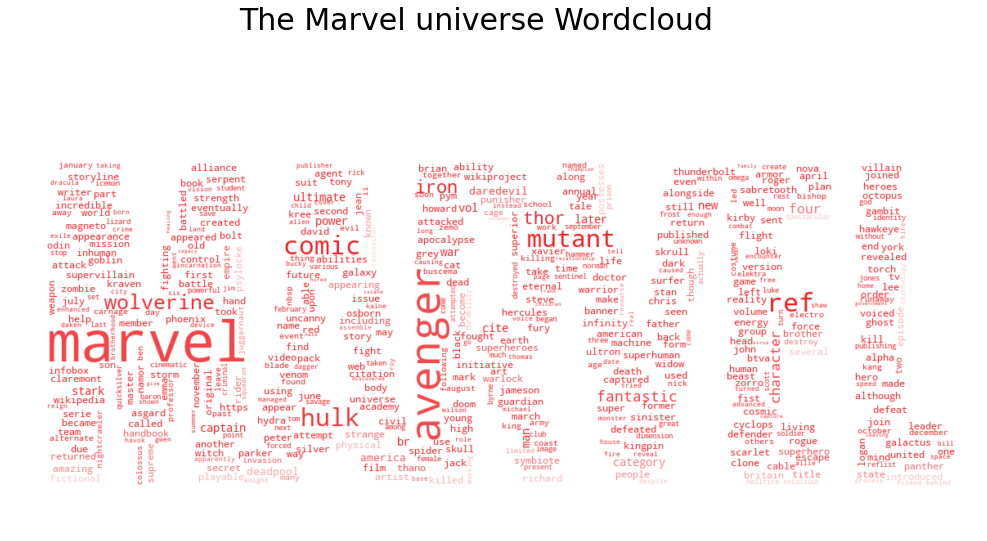

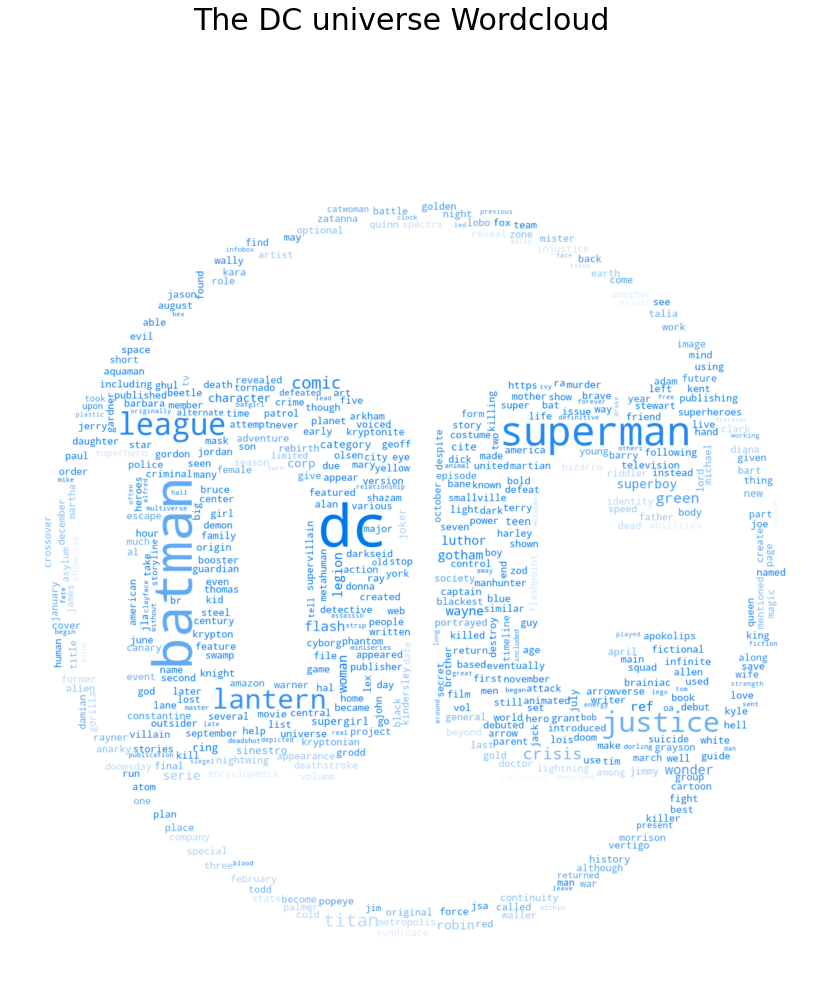

In [7]:
# All words in one string were each word is repeating according to its score
marvel_WordCloudList = ' '.join([word for word in list(TF_TR_marvel.keys()) for i in range(math.ceil(TF_TR_marvel[word]))])
DC_WordCloudList = ' '.join([word for word in list(TF_TR_DC.keys()) for i in range(math.ceil(TF_TR_DC[word]))])

# Open the universe logo picture
maskMarvel = np.array(Image.open("MarvelLogo.PNG"))
maskDC = np.array(Image.open("DCLogo.PNG"))

# Setup the wordcloud and plot:
# (The wordcloud package looks for collocations in real texts therfore collocations = False):
marvel_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
                              max_font_size = 100, 
                              max_words = 500,
                              mask=maskMarvel
                             
                        ).generate(marvel_WordCloudList)

DC_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
                              max_font_size = 100, 
                              max_words = 500,
                              mask=maskDC
                             
                        ).generate(DC_WordCloudList)

# Display the generated images:
image_colors = ImageColorGenerator(maskMarvel)
plt.figure(figsize=[20,8])
plt.imshow(marvel_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'The Marvel universe Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()



image_colors = ImageColorGenerator(maskDC)
plt.figure(figsize=[15,15])
plt.imshow(DC_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'The DC universe Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

> That is pretty nice! The word-clouds show which words are most represented and relevant in the two universes. The words *Avenger* and *Wolverine* are most frequent and valuable in the Marvel universe. Whereas *Batman* and *Superman* are most weighted in the Marvel universe.

<hr style="border:0.5px solid gray"> </hr>

# Exercise 3: 
Find communities and create associated TF-IDF word clouds (from lecture 7 and 8). In this exercise, we assume that you have been able to find communities in your network. It's OK to only work on a single universe in this one.

Here's what you need to do:

#### Explain briefly how you chose to identify the communities: Which algorithm did you use, how does it work?

> We have chosen to work with the **Marvel** Universe for the rest of this assignment. To find the communities in the marvel universe the **Louvain algorithm** is used, which maximises the modularity. The algortihm allows identifying communities in very large networks in a short computational running time. The Louvain algorithm has two phases. First, it looks for small communities by optimizing modularity in the local. Second, it aggregates nodes of the same community and builds a new network where whose nodes are the communities. These two steps are repeated iteratively until a maximum of modularity is attained. The output of the algorithm gives several partitions, where the partition found in the first step typically consists of many communities of small sizes. At subsequent steps, larger and larger communities are found due to the aggregation mechanism. This process naturally leads to hierarchical decomposition of the network. The algorithm does not ensures the global maximum of modelarity but the algorithm often provides a decomposition in communities that has a modularity that is close to optimality.
>
> To find the communities the Package community is used. And to structre the communities data connected to the nodes, the community numbers are merged into the marvel dataframe:


In [8]:
# Choose the Marvel universe graph and make it an undirected graph
G_Marvel_u = G_Marvel.to_undirected()

# Identify the communities in the Marvel Universe. Chosen algorithm is "best partition".
partition = community.best_partition(G_Marvel_u)

# Update the marvel dataframe for later use with the found Community number
d = pd.DataFrame.from_dict(partition,orient='index')  # From a dict to a dataframe
d.reset_index(inplace=True) # Index to collumn
d = d.rename(columns = {'index':'WikiLink',0:'ComNo'}) # rename columns
Marvel = d.merge(marvel, on='WikiLink', how='inner') # Merge marvel dataframe and Community number dataframe
print("")
print("The marvel dataframe with the community number connected to the character:")
print(Marvel.head())


The marvel dataframe with the community number connected to the character:
                 WikiLink  ComNo No. CharacterName
0  Rick_Jones_(character)      0   0        A-Bomb
1    Abomination_(comics)      0   1   Abomination
2         Achebe_(comics)      1   5        Achebe
3                    Ajak      0  10          Ajak
4     Savage_Land_Mutates      2  12     Amphibius


> Above the head of the marvel dataframe is shown. ComNo is the column of the community number connected to the character (WikiLink). 

#### How many communities did you find in total?


In [9]:
print('We have %d communities in the Marvel universe.'%len(set(partition.values())))

We have 7 communities in the Marvel universe.


> The found number of communities can change by running the algorithm again. 

#### Plot the distribution of community sizes.


In [10]:
print(Marvel['ComNo'].value_counts())

0    293
2    289
1    245
3    228
5     68
4     67
6      4
Name: ComNo, dtype: int64


> The distribution shows us that the algorithm find some large communities which almost have the same size. And then it find some very small ones. 

#### For the 5-10 largest communities, create TF-IDF based rankings of words in each community. There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.


> In the Marvel universe the chosen communitie algorithm found more than 5 and less than 10 different communities. Therefore we uses all the found communities. We want to find the TF-IDF based ranking of words for every community and this is done by following 2 steps.
>
> **Step 1:** Create the TF-List for every community. This time we use the log normalization TF-weight. This is due to if we calculate the raw count TF (As in the TF-TR in EX2), which gives us large numbers and then use the IDF, which gives us a small weight, then the TF will dominate the result. That means that the words, with the largest TF-IDF valye for every community, would be very common words and not necessarily the most important words. By using log normalization $\log(1+f_{{t,d}})$ (Where $f_{t,d}$ is the raw count TF) we ensure that TF and IDF are on same scale. 
>
> Below is the function for creating the TF-List presented:

In [39]:
#Function to create the TF_List for each community.
def TFListC(df, Universe, ComNo): # input: df = Universe dataframe, Universe =universe name and ComNo = the specific community number
    
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")
    
    # An empty sting
    f = ""  
    
    # For every wikipage in the specific community add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):       
        if df['ComNo'].iloc[i] == ComNo:
            No = df['No.'].iloc[i]
            f += io.open(path_folder + Universe + No + ".txt",'r',encoding = 'utf-8').read()
   
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    s = [w for w in onlywords if w.lower() not in stops]
    ekstrastops = ['comic','comics','character','new'] 
    words = [w for w in s if w.lower() not in ekstrastops]
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    
    # Copy the dictionary
    tf_w = copy.deepcopy(FreqWord)
    
    # Calculate a log normalization to the frequency
    for key, value in FreqWord.items():
        w = np.log(1 + value)
        tf_w[key] = w
    
    # Return TF and list of words:
    return tf_w, words

# Number of communities:
NC = Marvel['ComNo'].nunique()

# Create the TFLIST and wordlist for all communities:
TFListCom = []
Words = []
for i in range(NC):
    TFListCom.append(TFListC(Marvel, 'Marvel', i)[0])
    Words.append(TFListC(Marvel, 'Marvel', i)[1])

for i in range(NC):
    print("Top 5 TF for community %d:"%i)
    print(list({k: v for k, v in sorted(TFListCom[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

Top 10 TF for community 0:
[('ref', 9.309099143999447), ('marvel', 9.252920819511301), ('cite', 8.174702882469461), ('avengers', 7.907651594711089), ('hulk', 7.906915488678587)]

Top 10 TF for community 1:
[('ref', 8.837971491357209), ('marvel', 8.690810307580046), ('man', 8.114922974204593), ('avengers', 8.056426767522984), ('america', 7.950502434808851)]

Top 10 TF for community 2:
[('ref', 9.20693457884135), ('marvel', 8.917712757131387), ('category', 7.954723334497908), ('wolverine', 7.890956716138919), ('mutants', 7.835974581721566)]

Top 10 TF for community 3:
[('ref', 9.005282288208358), ('marvel', 8.949884285777994), ('cite', 7.796057974316123), ('category', 7.7354333524996886), ('characters', 7.4133673356952405)]

Top 10 TF for community 4:
[('ref', 7.7266536648476425), ('marvel', 7.668561108015897), ('thor', 7.494430215031565), ('loki', 6.638567789166521), ('avengers', 6.483107351457199)]

Top 10 TF for community 5:
[('ref', 7.562681246721884), ('marvel', 7.374629015218945), 

> Above is the TF top 5 for every community. We see that the same word occurs in every community. And therefor we need to calulate the IDF-value to find out how important a word is to community.
>
> **Step 2:** Next step is to make the TF-IDF List. As IDF we choose the Inverse document frequency smooth: 
>
> ${\displaystyle \log \left({\frac {N}{1+n_{t}}}\right)+1}$
>
> Where:
>
> N = Total number of Communities
>
> $n_{t}$ = The number of communities containing the term t.
>
> The IDF is a measure of how much information the word provides. Is the word common or rare across all documents? IDF is the logarithmically scaled inverse fraction of the documents that contain the word.
>
> In the below function is the IDF value calculated for every word in the Marvel universe and next the TF-IDF list is created by multiplying the TF-value and the IDF-value for every word in every community.
> ${\displaystyle \mathrm {TFIDF} (t,d,D)=\mathrm {TF} (t,d)\cdot \mathrm {IDF} (t,D)}$

In [40]:
#Function to create the TF-IDF_List for each community.
def TF_IDFList(TFList, wordList):
    
    #creating empty dictionary:
    n_t = defaultdict(int)

    #Counting n_t for each word:
    for community_word_list in wordList:
        for word in set(community_word_list):
            n_t[word] += 1
    
    # Copy dictionary:
    IDF = copy.deepcopy(n_t)
    
    # Calculate the IDF-value for each word:      
    for key, value in n_t.items():
        IDF_value = np.log(len(wordList)/(value+1))+1
        IDF[key] = IDF_value
    
    # Copy dictionary:
    TF_IDF = copy.deepcopy(TFList)
    
    # Now calculating TF-IDF by multiplying TF-value and IDF-value in the dictionary: 
    for dic in range(len(TFList)):
        for key, value in TFList[dic].items(): #looking at the TF lists
            for key1, value1 in IDF.items(): #Lokking at the IDF dict
                if key == key1: #check if the keys are equal
                    new_value = np.dot(value, value1) #Calculating the value. 
                    TF_IDF[dic][key] = new_value #replacing the value
    return TF_IDF

# Create the TF-IDF List for all communities:
TF_IDF = TF_IDFList(TFListCom, Words)

for i in range(NC):
    print("top 5 TF_IDF for community %d:"%i)
    print(list({k: v for k, v in sorted(TF_IDF[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

top 5 TF_IDF for community 0:
[('kro', 10.23496624045609), ('sakaar', 9.570852753117562), ('paibok', 9.53843833822207), ('dorma', 9.14721564984482), ('yondu', 9.075136859240953)]

top 5 TF_IDF for community 1:
[('taurus', 9.756115695425295), ('vanko', 9.602807373549064), ('adder', 9.316708427508008), ('mimi', 8.901215528720174), ('sidewinder', 8.54370238232902)]

top 5 TF_IDF for community 2:
[('caliban', 11.317611995507713), ('sublime', 10.877046387672097), ('emplate', 9.927293932792693), ('theresa', 9.843330314809318), ('kwannon', 9.78556399670138)]

top 5 TF_IDF for community 3:
[('zorro', 14.088393958026622), ('carlie', 10.484269533680605), ('shriek', 10.3743568586129), ('macendale', 9.899652322581845), ('foswell', 9.602807373549064)]

top 5 TF_IDF for community 4:
[('fandral', 9.8716673295537), ('skurge', 9.505550703501605), ('typhon', 9.333500485102034), ('fafnir', 8.524882273055102), ('karnilla', 8.365797632710276)]

top 5 TF_IDF for community 5:
[('klara', 9.368977800494504), (

> Above is printet the words with the largest TF-IDF value for each community. And this time it shows different words in different communities. 

#### Create a word-cloud displaying the most important words in each community (according to TF-IDF). Comment on your results (do they make sense according to what you know about the superhero characters in those communities?)


> The code below shows how the word-clouds are done for each ommunity.

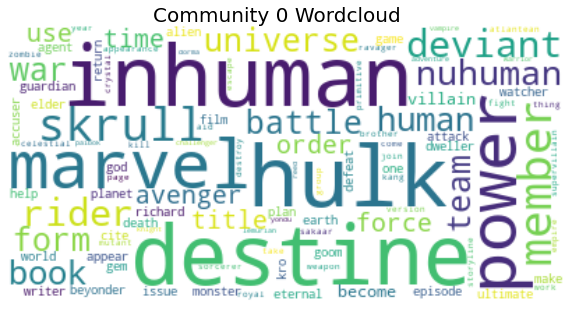

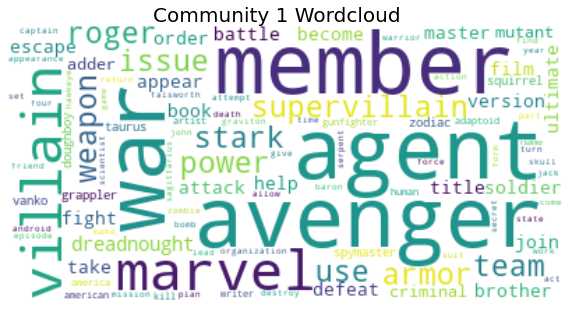

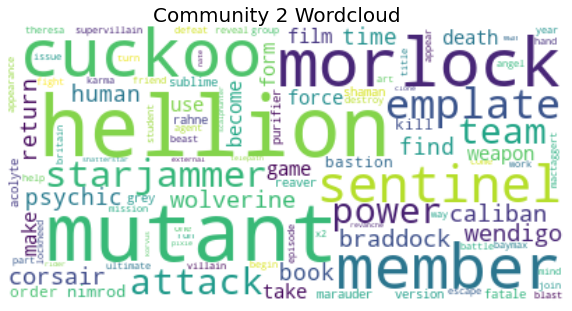

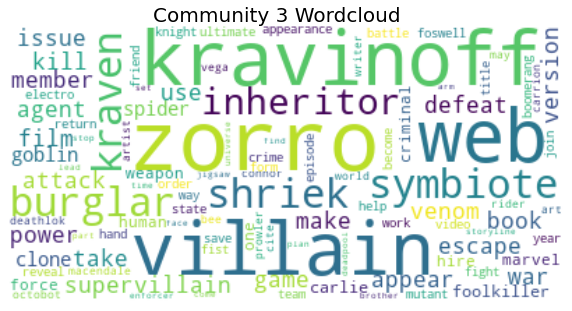

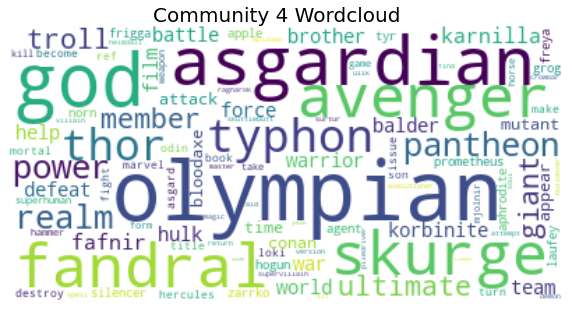

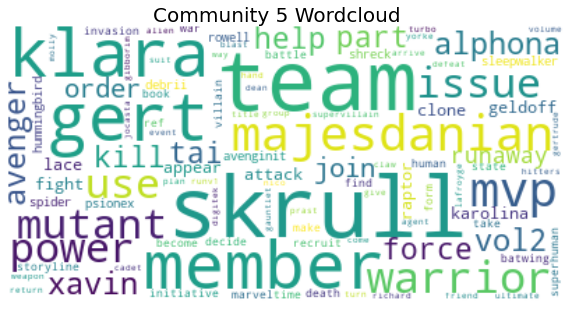

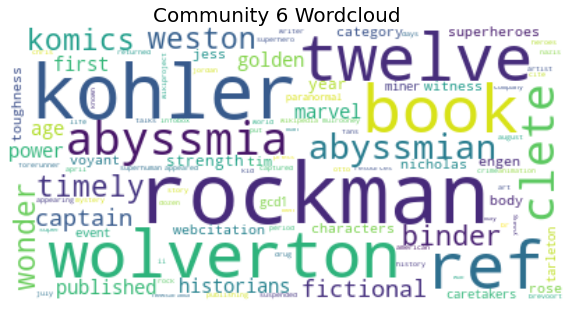

In [34]:
Communitie_WordCloudList = []
marvel_com_wordcloud = []
for i in range(NC):
    Communitie_WordCloudList.append(' '.join([word for word in list(TF_IDF[i].keys()) for j in range(int(TF_IDF[i][word]))]))
for i in range(NC):
    marvel_com_wordcloud.append(WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
                              max_font_size = 60, 
                              max_words = 100,
                             
                            ).generate(Communitie_WordCloudList[i]))

for i in range(NC):
    # Display the wordcloud:
    plt.figure(figsize=[10,10])
    plt.imshow(marvel_com_wordcloud[i], interpolation="bilinear")
    plt.figtext(0.5,0.7,'Community %d Wordcloud'%i,fontsize=20,ha='center')
    plt.axis("off")
    plt.show()

> By looking at the word-clouds we deffinetly see that different words tells a story about the single universe. And the word of charecters narmes which is in the same universe are also charecters whitch occers in the same marvel stories. 

<hr style="border:0.5px solid gray"> </hr>

# Exercise 4: 
Analyze the sentiment of the communities (lecture 8). Here, we assume that you've successfully identified communities. Unlike above - we work all communities. It's still OK to work with data from a single universe. More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below;

* We name each community by its three most connected characters.
* Average the average sentiment of the nodes in each community to find a community level sentiment.
Here's what you need to do:

#### Calculate and store sentiment for every single page.


#### Create a histogram of all character's associated page-sentiments.


#### What are the 10 characters with happiest and saddest pages?


#### What are the three happiest communities?


#### What are the three saddest communities?


#### Do these results confirm what you can learn about each community by skimming the wikipedia pages?

<hr style="border:0.5px solid gray"> </hr>

# Appendix

#### Function to download Wikipages

    def download(df,Universe): # where df is the dataframe and Universe is the name of the Universe we wants to download
      for i in range(df.shape[0]): 
        baseurl = "https://en.wikipedia.org/w/api.php?"
        action = "action=query"
        title = "titles=" + df["WikiLink"].iloc[i]
        content = "prop=revisions&rvprop=content"
        dataformat ="format=json"

        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        #print(query)

        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        wikijson = json.loads(wikitext)['query']['pages']
        key = list(wikijson.keys())[0]
        wiki_Print = wikijson[key]['revisions'][0]['*']
    
    
        sys.stdout = open(Universe + df['No.'].iloc[i] + ".txt", "w",encoding="utf-8") 
        print(wiki_Print)
        
        # The file names we use 'the universe + ID number' instead of using the charector name. This is due to some names includes punctuation that are not allowed when saving a .txt file. 

#### Fuctions to create a network

    # Helperfunction to find links in wikipages and remove the link if it is not a character in the data.
    def findLinksAndRemove(f,df1,df2):
        # Use a regular expression to extract all outgoing links from each of the pages you downloaded above.
        links = re.findall("\[\[(.*?)\]\]", f)
        links = [x.replace(' ','_') for x in links]
        links = [s.split('|') for s in links]

        # For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.
        edges = []
        for i in range(len(links)):
            if len(df1.loc[df1['WikiLink'] == links[i][0]]) >= 1 or len(df2.loc[df2['WikiLink'] == links[i][0]]) >= 1:
                edges.append(links[i][0]) 
        return(edges)

    # Use a NetworkX DiGraph to store the network. Store also the properties of the nodes (i.e. from which universe they hail).
    # Function to add nodes in the graph. Every charactor in the data is a node in the graph.
    def AddNodes(G, df, Universe):
        for i in range(df.shape[0]):
            G.add_node(df.WikiLink.iloc[i], Universe = Universe)

    # Function to add edges in the graph.        
    def AddEdges(G, df1, df2, Universe):
        path_folder = ("./Files/")

        for i in range(df1.shape[0]):
            Node = df1['WikiLink'].iloc[i]
            No = df1['No.'].iloc[i]

            f = io.open(path_folder + Universe + No + ".txt",'r',encoding = 'utf-8').read()

            #Use the helperfuncktion to find links and remove the link if it is not a character in the data.
            edgesTo = findLinksAndRemove(f,df1,df2)

            for j in edgesTo:
                if j in list(G.nodes):
                    G.add_edge(Node, j)